In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head(5)

date_time  deg_C  relative_humidity  absolute_humidity  sensor_1  \
0  2010-03-10 18:00:00   13.1               46.0             0.7578    1387.2   
1  2010-03-10 19:00:00   13.2               45.3             0.7255    1279.1   
2  2010-03-10 20:00:00   12.6               56.2             0.7502    1331.9   
3  2010-03-10 21:00:00   11.0               62.4             0.7867    1321.0   
4  2010-03-10 22:00:00   11.9               59.0             0.7888    1272.0   

   sensor_2  sensor_3  sensor_4  sensor_5  target_carbon_monoxide  \
0    1087.8    1056.0    1742.8    1293.4                     2.5   
1     888.2    1197.5    1449.9    1010.9                     2.1   
2     929.6    1060.2    1586.1    1117.0                     2.2   
3     929.0    1102.9    1536.5    1263.2                     2.2   
4     852.7    1180.9    1415.5    1132.2                     1.5   

   target_benzene  target_nitrogen_oxides  
0            12.0                   167.7  
1             9.9                    98.9  
2             9.2                   127.1  
3             9.7                   177.2  
4             6.4                   121.8

## Графики зависимостей признаков друг от друга и их распределение

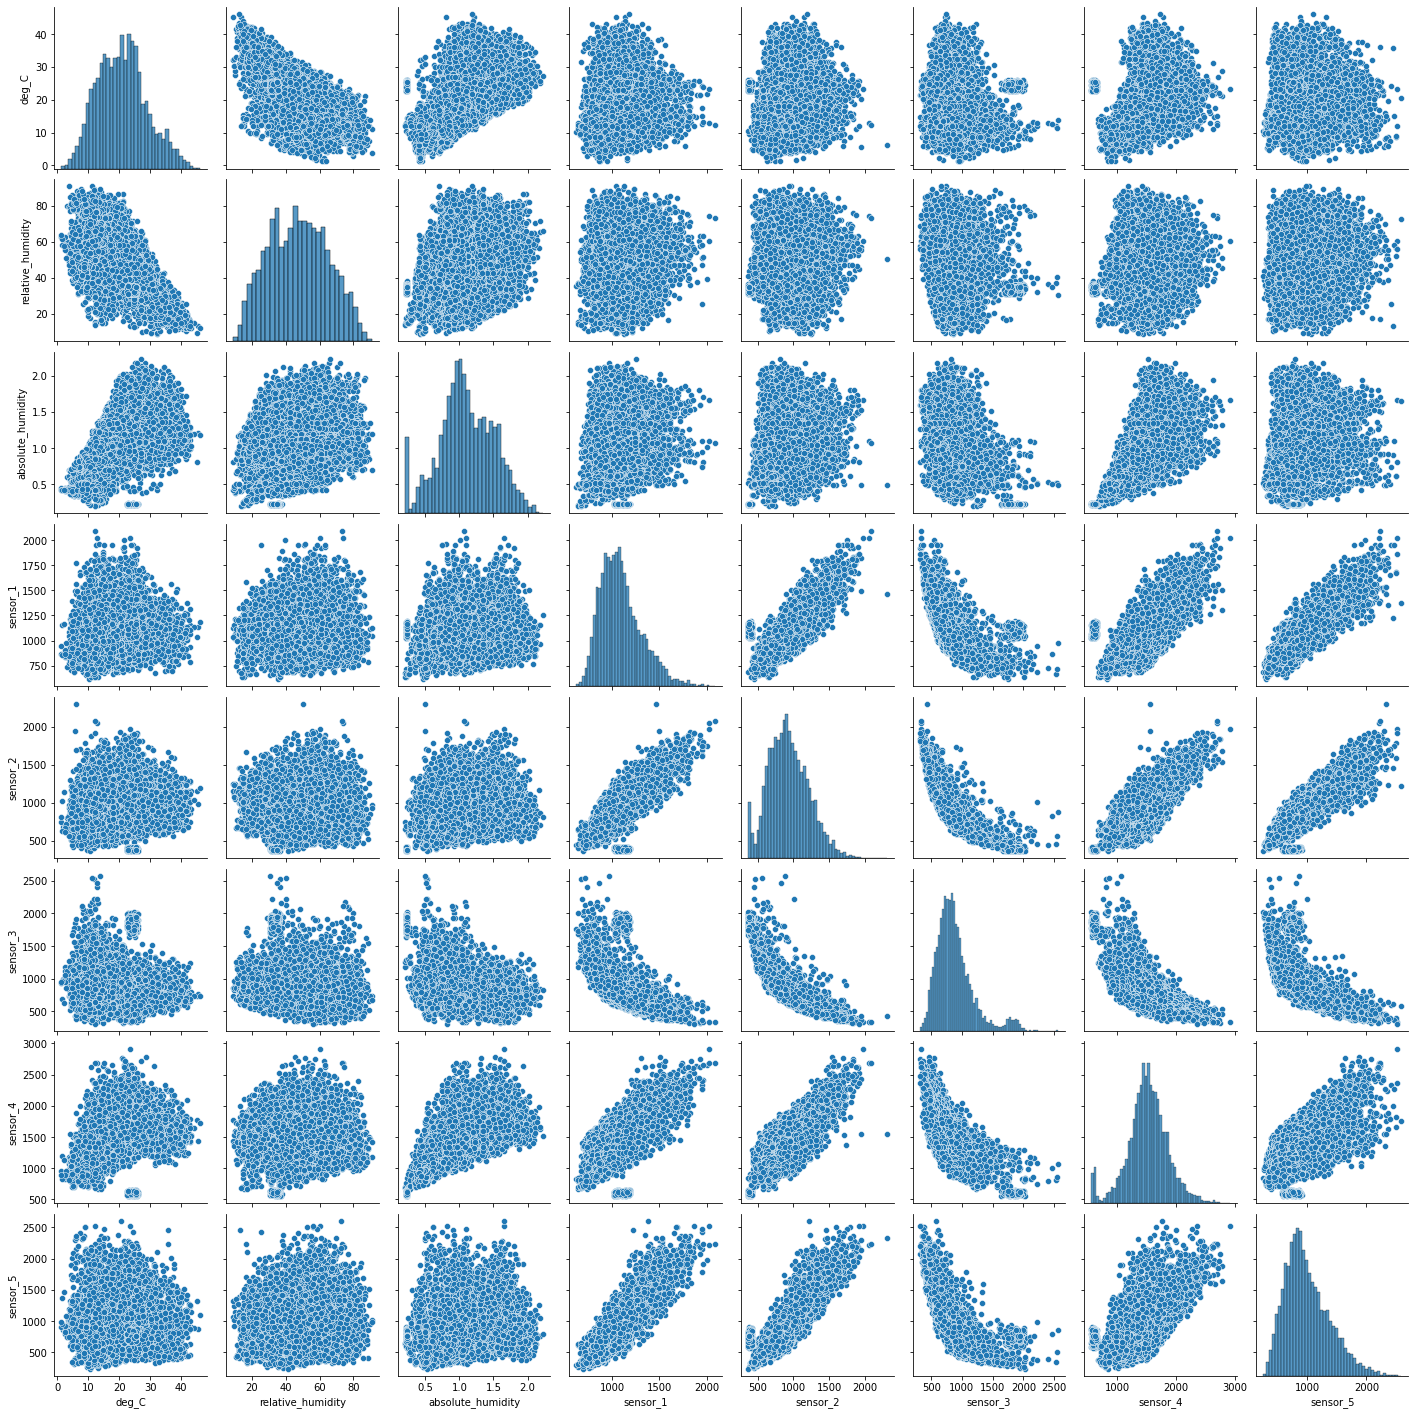

In [4]:
features, targets = list(data.columns[1:-3]), list(data.columns[-3:])
sns.pairplot(data[features])

Можно заметить, что есть признаки, зависимость между которыми похожа на линейную. Такие зависимости прослеживаются только между признаками сенсоров.

Рассмотрим кореляционную матрицу

In [5]:
data[features].corr()

deg_C  relative_humidity  absolute_humidity  sensor_1  \
deg_C              1.000000          -0.668002           0.445162  0.017513   
relative_humidity -0.668002           1.000000           0.249013  0.093130   
absolute_humidity  0.445162           0.249013           1.000000  0.105977   
sensor_1           0.017513           0.093130           0.105977  1.000000   
sensor_2           0.133167          -0.035152           0.236894  0.811898   
sensor_3          -0.145437          -0.102146          -0.485445 -0.592233   
sensor_4           0.308202           0.027002           0.567376  0.643191   
sensor_5          -0.050567           0.126466           0.124945  0.860849   

                   sensor_2  sensor_3  sensor_4  sensor_5  
deg_C              0.133167 -0.145437  0.308202 -0.050567  
relative_humidity -0.035152 -0.102146  0.027002  0.126466  
absolute_humidity  0.236894 -0.485445  0.567376  0.124945  
sensor_1           0.811898 -0.592233  0.643191  0.860849  
sensor_2           1.000000 -0.819334  0.812454  0.863464  
sensor_3          -0.819334  1.000000 -0.741439 -0.706006  
sensor_4           0.812454 -0.741439  1.000000  0.641120  
sensor_5           0.863464 -0.706006  0.641120  1.000000

Действительно, корреляции некоторых признаков по модулю близки к 1. Например $sensor_1$ и $sensor_5$. Для избежания слишком больших весов модели и переобучения придется использовать регуляризацию или отбрасывать какие-либо признаки.

## Графики зависимостей целевых переменных от признаков

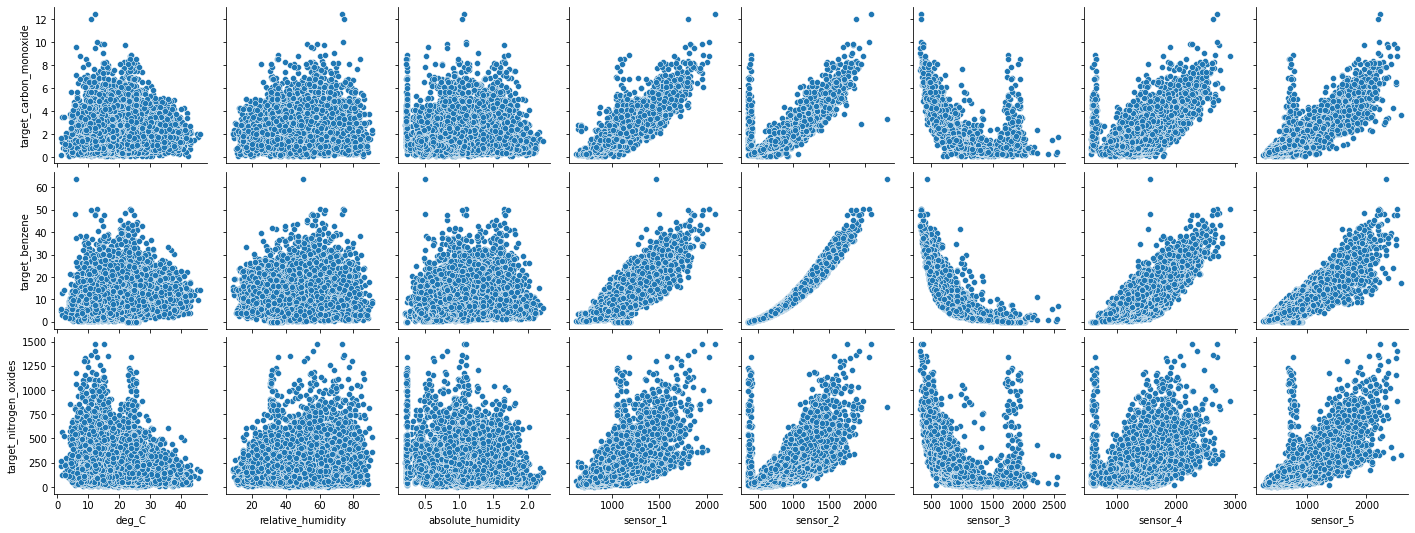

In [6]:
sns.pairplot(data, x_vars=features, y_vars=targets)

Можно заметить довольно хорошую зависимость ***target_benzene*** и признаков сенсоров, особенно от $sensor_2$. 

Довольно странно себя ведут ***target_carbon_monoxide*** и ***target_nitrogen_oxides***. На многих графиках наблюдаются некоторые значения признаков, при которых значения целевой переменной могут быть любыми. На графиках это выглядит как вертикальные прямые. Из этого можно сделать вывод, что отбрасывать признаки в дальнейшем может быть плохой идеей, так как каждый признак может внести дополнительную определенность, если мы попадем на такое значение какого-либо признака.

In [7]:
data.date_time = pd.to_datetime(data.date_time)

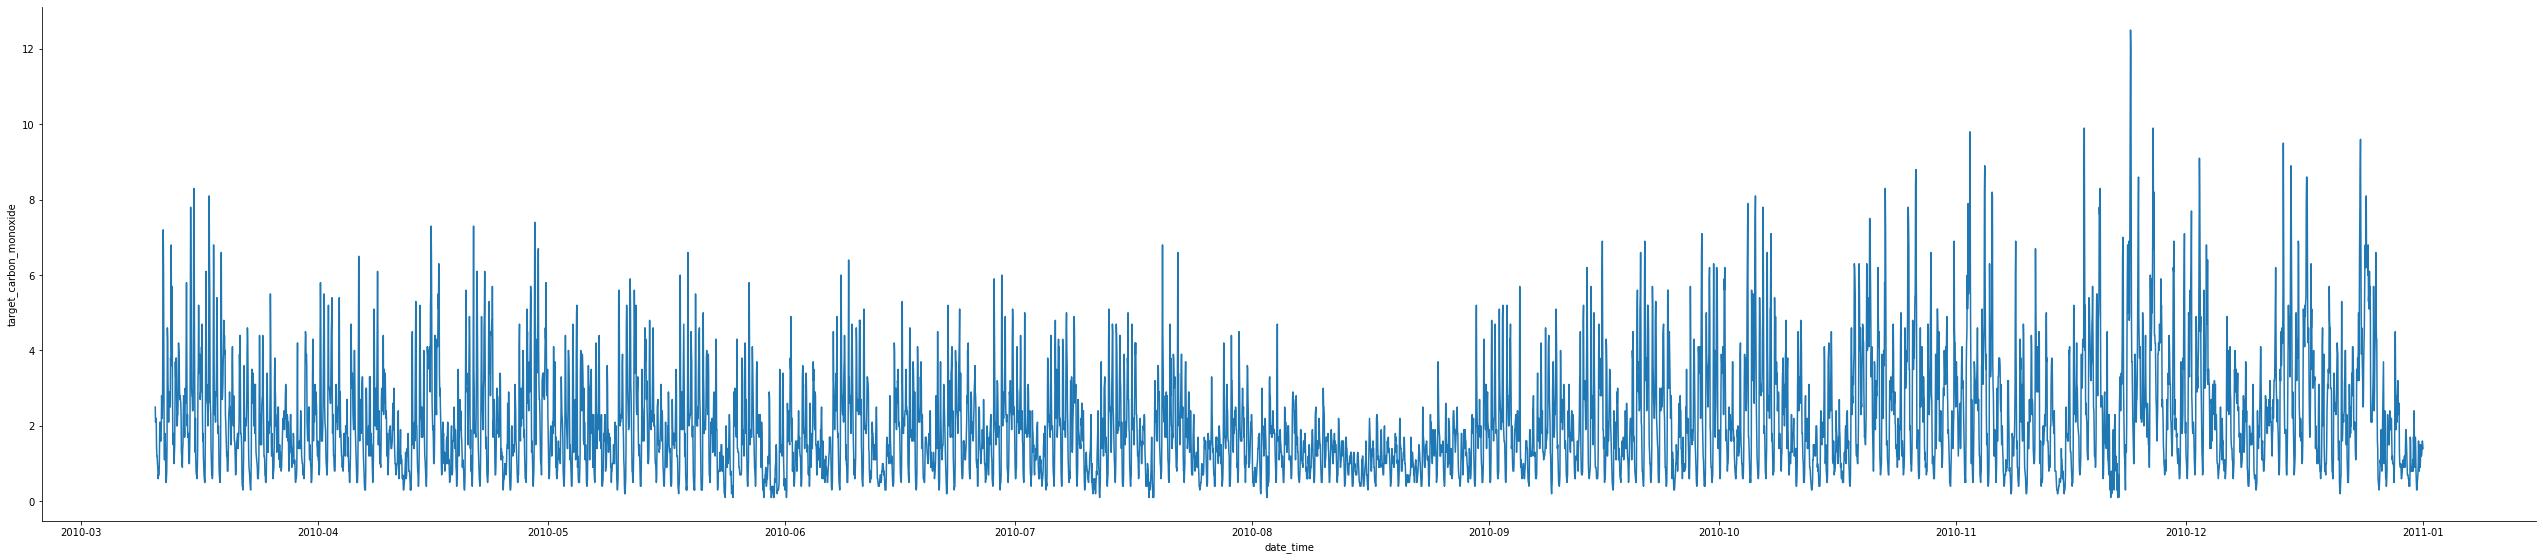

In [8]:
p=sns.relplot(data=data, kind="line",
    x="date_time", y="target_carbon_monoxide")
p.fig.set_size_inches(40,8)

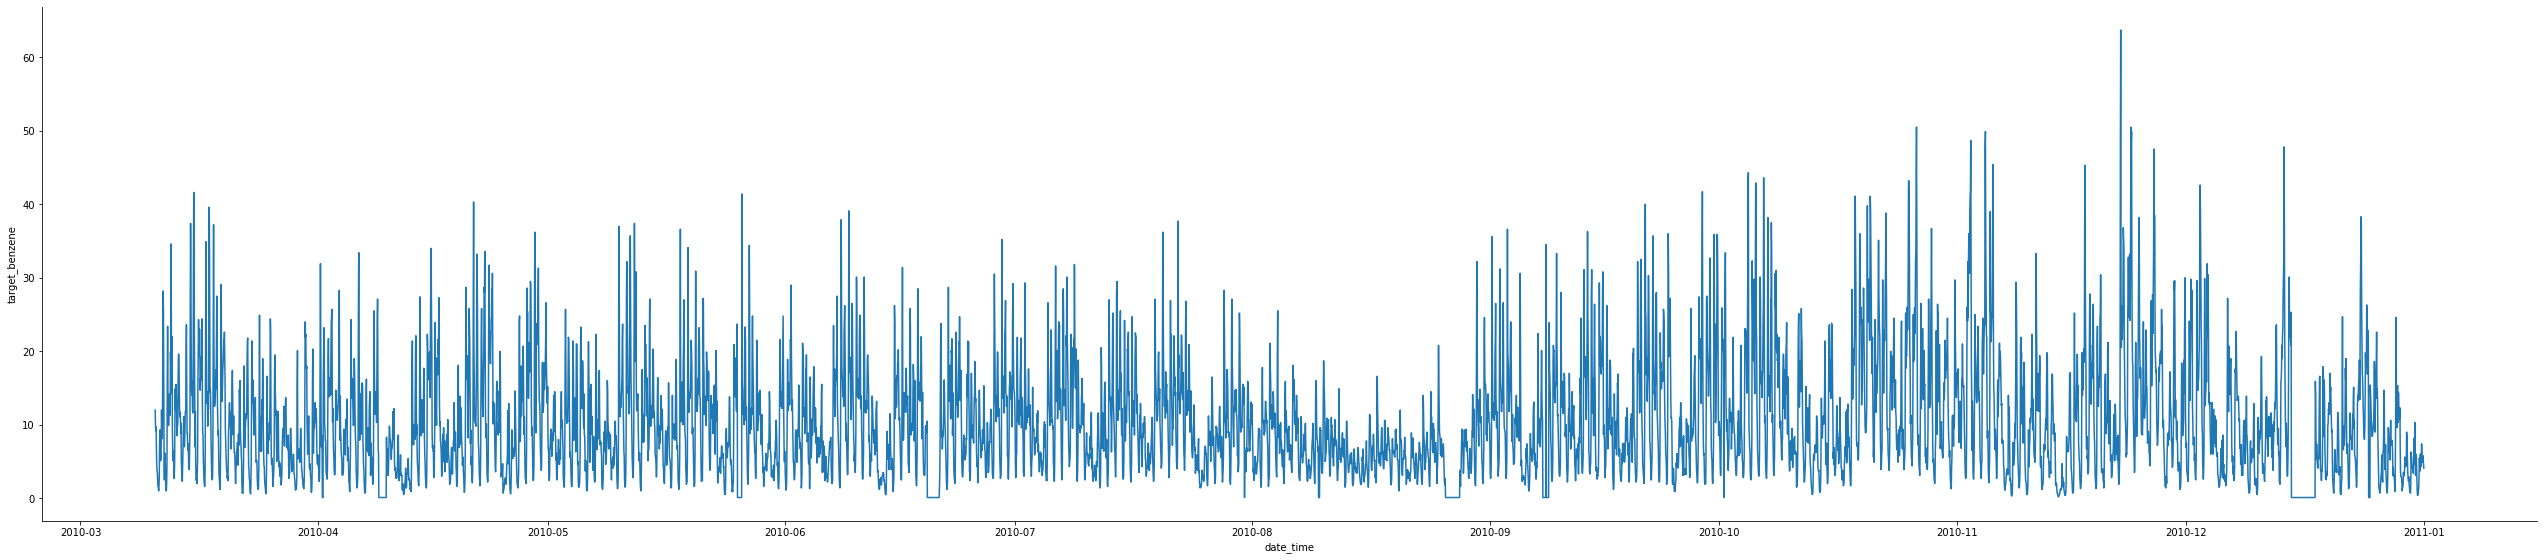

In [9]:
p=sns.relplot(data=data, kind="line",
    x="date_time", y="target_benzene")
p.fig.set_size_inches(40,8)

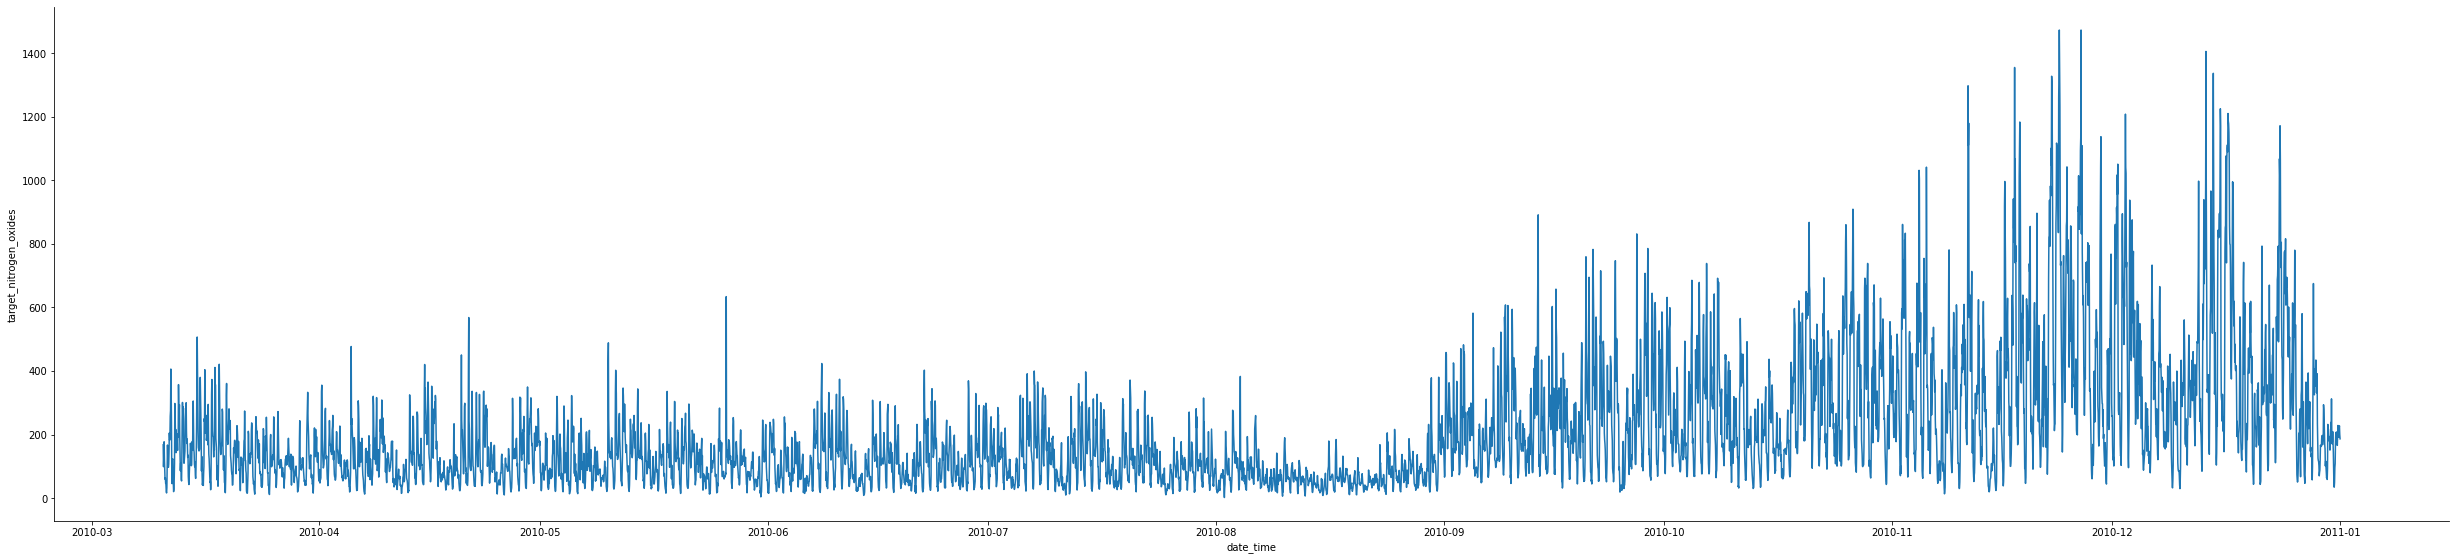

In [10]:
p=sns.relplot(data=data, kind="line",
    x="date_time", y="target_nitrogen_oxides")
p.fig.set_size_inches(40,8)

Можно заметить некое подобие периодичности. Для каждого таргета можно выделить промежутки, в которых их поведение довольно схоже. Это промежутки $[2010-03, 2010-08], [2010-08, 2010-09], [2010-09,2011-01]$. При обучении будет важно, чтобы модель учитывала эти "сезоны" при предсказании.

Изобразим график со средними показателями по дням.

In [11]:
data['date'] = data.date_time.dt.date
means_by_day = data.groupby(by='date').mean()
means_by_day

deg_C  relative_humidity  absolute_humidity     sensor_1  \
date                                                                       
2010-03-10  12.166667          54.283333           0.765633  1302.016667   
2010-03-11   9.762500          63.679167           0.775767  1250.112500   
2010-03-12  11.133333          51.091667           0.663104  1272.904167   
2010-03-13  12.779167          50.862500           0.732296  1318.937500   
2010-03-14  15.800000          49.104167           0.849671  1332.337500   
...               ...                ...                ...          ...   
2010-12-28  11.195833          64.533333           0.855137  1125.633333   
2010-12-29  10.362500          59.254167           0.732187   934.416667   
2010-12-30   9.745833          40.725000           0.486687   883.112500   
2010-12-31   9.308333          39.087500           0.455321   903.245833   
2011-01-01   8.000000          41.300000           0.437500  1108.800000   

               sensor_2     sensor_3     sensor_4     sensor_5  \
date                                                             
2010-03-10   897.466667  1169.116667  1532.233333  1127.616667   
2010-03-11   830.900000  1284.591667  1506.645833   870.825000   
2010-03-12  1012.641667  1110.975000  1609.266667  1074.716667   
2010-03-13   986.633333   995.858333  1598.304167  1242.408333   
2010-03-14   937.570833  1007.875000  1558.391667  1232.341667   
...                 ...          ...          ...          ...   
2010-12-28   911.466667   725.312500  1273.770833  1001.479167   
2010-12-29   687.891667   925.583333  1063.716667   704.654167   
2010-12-30   696.691667  1002.254167   922.104167   660.937500   
2010-12-31   699.041667  1023.641667   912.737500   709.883333   
2011-01-01   745.700000   797.100000   880.000000  1273.100000   

            target_carbon_monoxide  target_benzene  target_nitrogen_oxides  
date                                                                        
2010-03-10                1.950000        8.600000              130.133333  
2010-03-11                2.183333        8.195833              140.150000  
2010-03-12                2.820833       12.220833              173.466667  
2010-03-13                2.625000       10.825000              182.025000  
2010-03-14                2.387500        9.550000              142.504167  
...                            ...             ...                     ...  
2010-12-28                2.037500        9.362500              301.000000  
2010-12-29                1.066667        3.854167              163.170833  
2010-12-30                1.000000        4.025000              164.254167  
2010-12-31                1.083333        3.983333              165.654167  
2011-01-01                1.400000        4.100000              186.500000  

[298 rows x 11 columns]

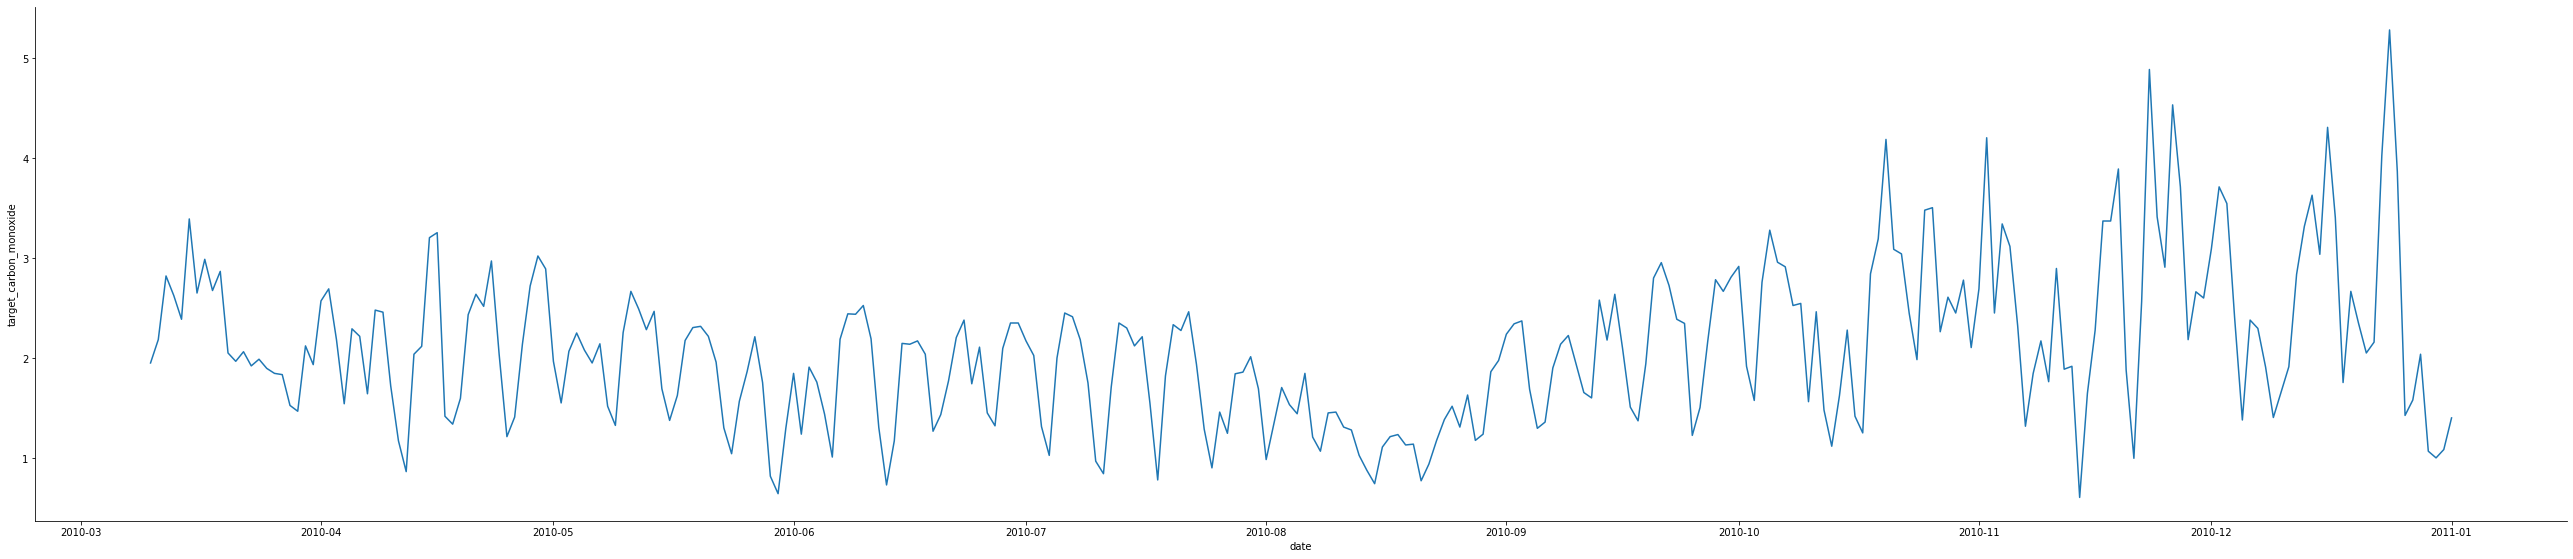

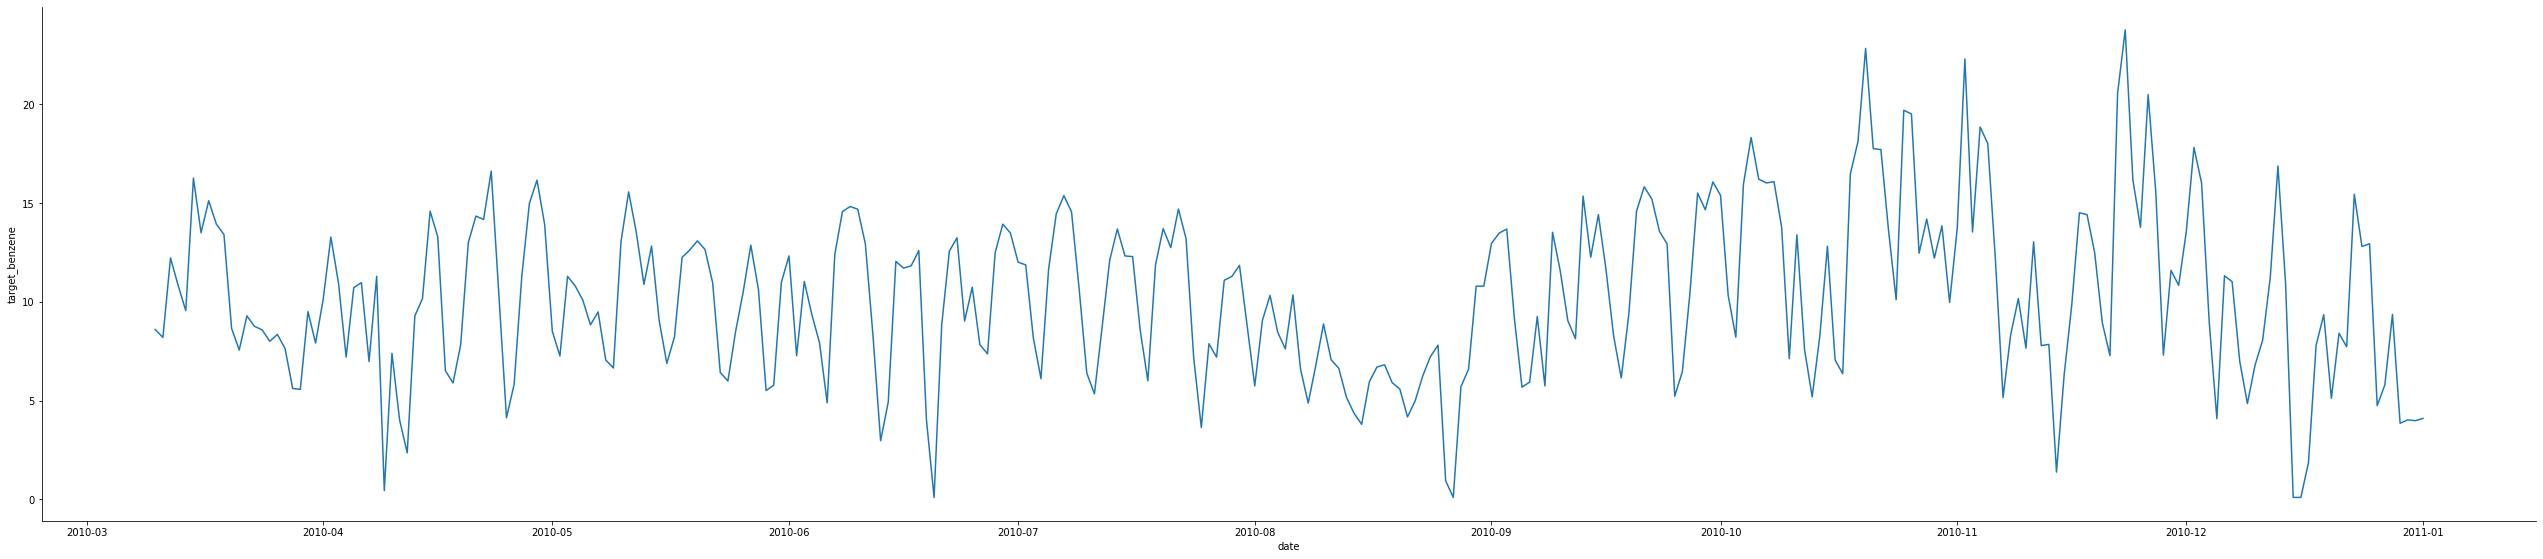

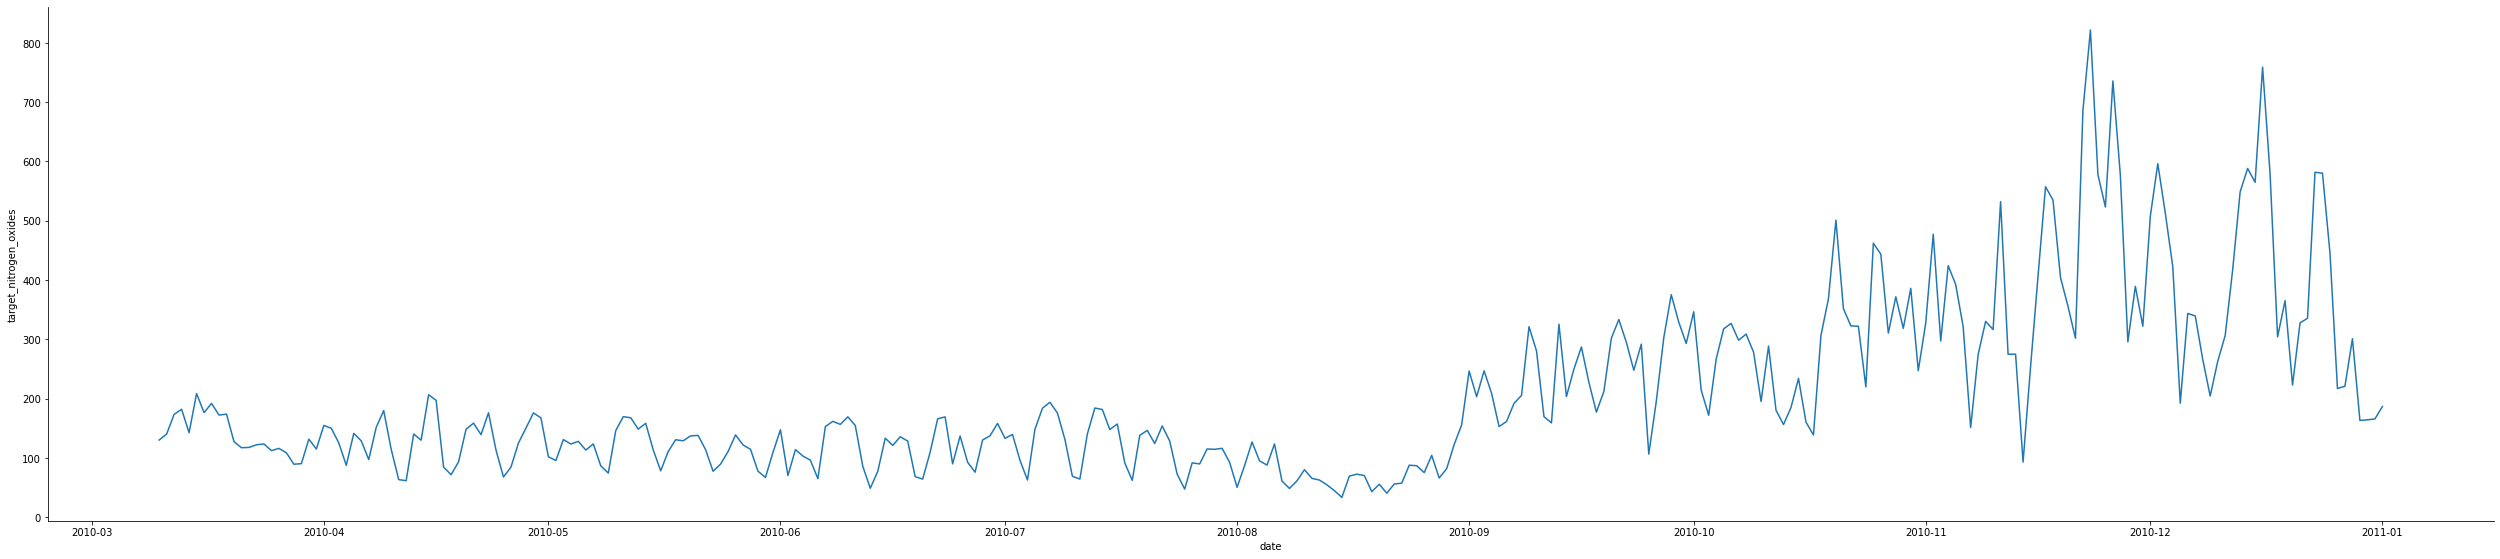

In [12]:
p=sns.relplot(data=means_by_day, kind="line",
    x="date", y="target_carbon_monoxide")
p.fig.set_size_inches(40,8)
p=sns.relplot(data=means_by_day, kind="line",
    x="date", y="target_benzene")
p.fig.set_size_inches(40,8)
p=sns.relplot(data=means_by_day, kind="line",
    x="date", y="target_nitrogen_oxides")
p.fig.set_size_inches(40,8)

Можно использовать преобразование Фурье, чтобы найти основные периоды.

In [13]:
import scipy as sp
import scipy.fftpack
import numpy as np

def freq(target: str, data):
    fft = sp.fftpack.fft(list(data[target]))
    fft_psd = np.abs(fft)**2
    fft_freq = sp.fftpack.fftfreq(len(fft), 1)
    
    plt.rcParams["figure.figsize"] = (20,3)
    plt.plot(fft_freq[fft_freq > 0], 10*np.log10(fft_psd[fft_freq > 0]))
    plt.xticks(np.linspace(0, 0.5, 25))
    
    return fft, fft_freq

def reverse_transform(target, fft, fft_freq, main_freq):
    new_fft = fft.copy()
    new_fft[fft_freq > main_freq] = 0

    inverse = np.real(sp.fftpack.ifft(new_fft))
    plt.plot(means_by_day.index, inverse, '-', c='r')

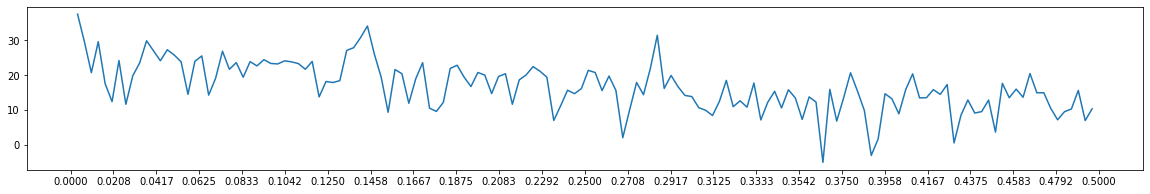

In [14]:
cm_fft, cm_fft_freq = freq('target_carbon_monoxide', means_by_day)

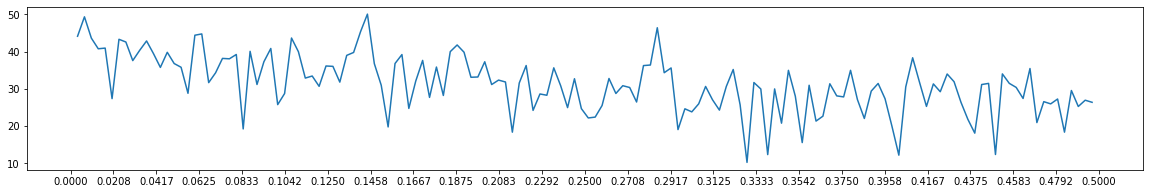

In [15]:
b_fft, b_fft_freq = freq('target_benzene', means_by_day)

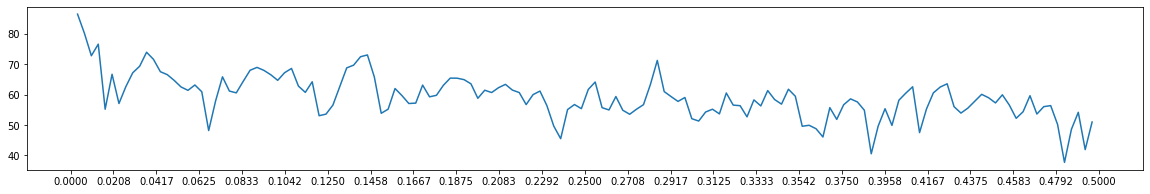

In [16]:
no_fft, no_fft_freq = freq('target_nitrogen_oxides', means_by_day)

Можно выделить некоторые важные частоты: $\approx 0.1457, \approx 0.285$. То есть периоды для средних показателей по дням $\approx 6.86$ и $3.5$ дней.

Можно рассмотреть периоды по часам.

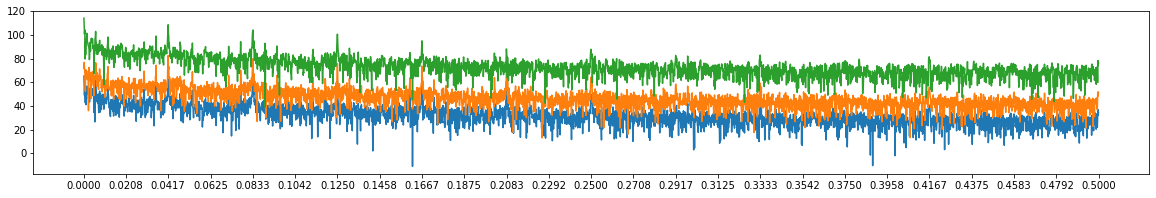

In [17]:
_ = freq('target_carbon_monoxide', data)
_ = freq('target_benzene', data)
_ = freq('target_nitrogen_oxides', data)

Здесь можно выделить следующие важные частоты: 0.0417, 0.0833, 0.1250, 0.1667. Или же периоды в часах: $24, 12, 8, 6$.

Посмотрим на частоты отдельно на промежутках $[2010-03, 2010-08], [2010-08, 2010-09], [2010-09,2011-01]$

In [18]:
interval_1 = data.date < data.date[3450]
interval_2 = (data.date > data.date[3450]) & (data.date < data.date[4200])
interval_3 = data.date > data.date[4200]

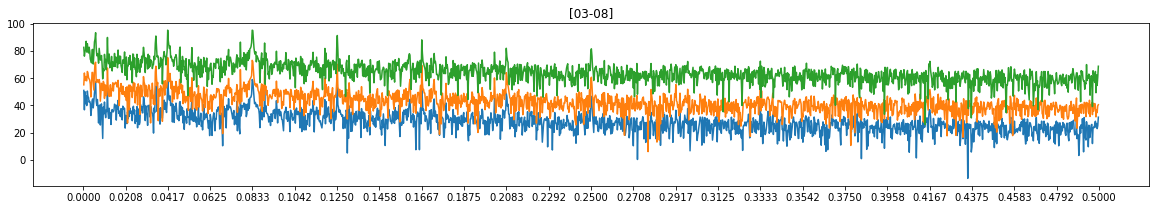

In [19]:
plt.title('[03-08]')
_ = freq('target_carbon_monoxide', data[interval_1])
_ = freq('target_benzene', data[interval_1])
_ = freq('target_nitrogen_oxides', data[interval_1])

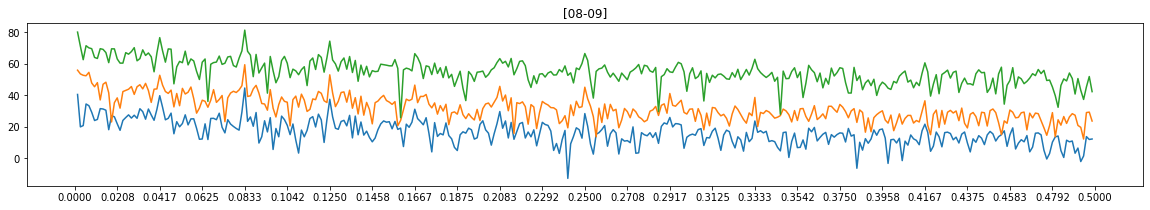

In [20]:
plt.title('[08-09]')
_ = freq('target_carbon_monoxide', data[interval_2])
_ = freq('target_benzene', data[interval_2])
_ = freq('target_nitrogen_oxides', data[interval_2])

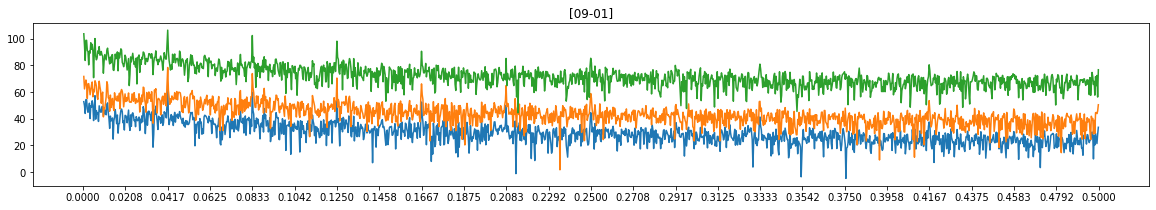

In [21]:
plt.title('[09-01]')
_ = freq('target_carbon_monoxide', data[interval_3])
_ = freq('target_benzene', data[interval_3])
_ = freq('target_nitrogen_oxides', data[interval_3])

Однако можно заметить, что важные частоты сохранились. Но на первом промежутке появился более явный пик на $0.25(4 \ часа)$ и $\approx 0.035$. То есть в целом структура изменения во времени остается схожей, а меняется разброс и среднее значение.

### Распределение целевых переменных


<AxesSubplot:xlabel='target_carbon_monoxide', ylabel='Count'>

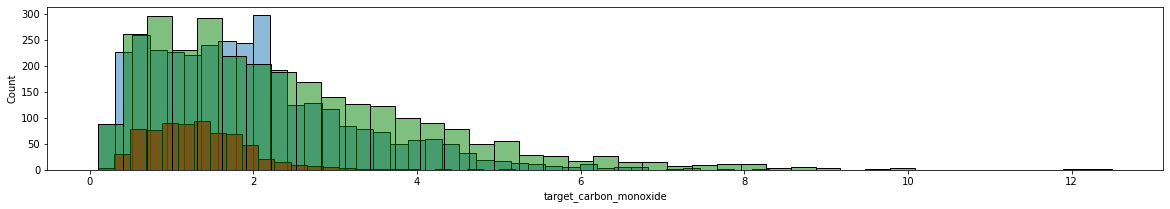

In [35]:
sns.histplot(data=data[interval_1], x='target_carbon_monoxide', alpha=0.5)
sns.histplot(data=data[interval_2], x='target_carbon_monoxide', color='red')
sns.histplot(data=data[interval_3], x='target_carbon_monoxide', color='green', alpha=0.5)

<AxesSubplot:xlabel='target_benzene', ylabel='Count'>

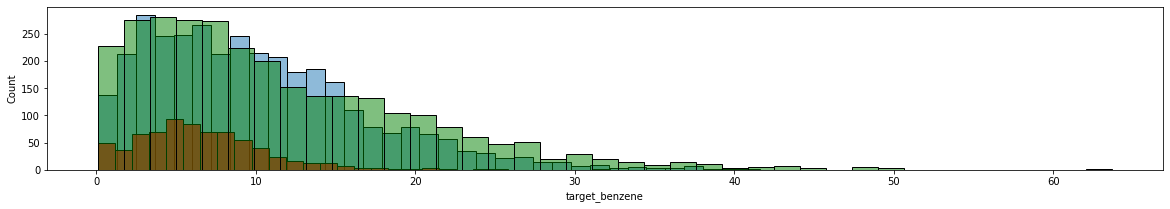

In [37]:
sns.histplot(data=data[interval_1], x='target_benzene', alpha=0.5)
sns.histplot(data=data[interval_2], x='target_benzene', color='red')
sns.histplot(data=data[interval_3], x='target_benzene', color='green', alpha=0.5)

<AxesSubplot:xlabel='target_nitrogen_oxides', ylabel='Count'>

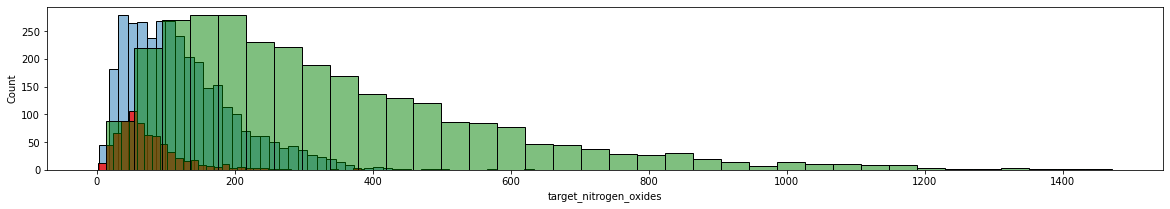

In [38]:
sns.histplot(data=data[interval_1], x='target_nitrogen_oxides', alpha=0.5)
sns.histplot(data=data[interval_2], x='target_nitrogen_oxides', color='red')
sns.histplot(data=data[interval_3], x='target_nitrogen_oxides', color='green', alpha=0.5)

In [59]:
data["season"] = np.nan
data.loc[interval_1, 'season'], data.loc[interval_2, 'season'], data.loc[interval_3, 'season'] = 1, 2, 3

In [60]:
data.head()

date_time  deg_C  relative_humidity  absolute_humidity  sensor_1  \
0 2010-03-10 18:00:00   13.1               46.0             0.7578    1387.2   
1 2010-03-10 19:00:00   13.2               45.3             0.7255    1279.1   
2 2010-03-10 20:00:00   12.6               56.2             0.7502    1331.9   
3 2010-03-10 21:00:00   11.0               62.4             0.7867    1321.0   
4 2010-03-10 22:00:00   11.9               59.0             0.7888    1272.0   

   sensor_2  sensor_3  sensor_4  sensor_5  target_carbon_monoxide  \
0    1087.8    1056.0    1742.8    1293.4                     2.5   
1     888.2    1197.5    1449.9    1010.9                     2.1   
2     929.6    1060.2    1586.1    1117.0                     2.2   
3     929.0    1102.9    1536.5    1263.2                     2.2   
4     852.7    1180.9    1415.5    1132.2                     1.5   

   target_benzene  target_nitrogen_oxides        date  season  
0            12.0                   167.7  2010-03-10     1.0  
1             9.9                    98.9  2010-03-10     1.0  
2             9.2                   127.1  2010-03-10     1.0  
3             9.7                   177.2  2010-03-10     1.0  
4             6.4                   121.8  2010-03-10     1.0

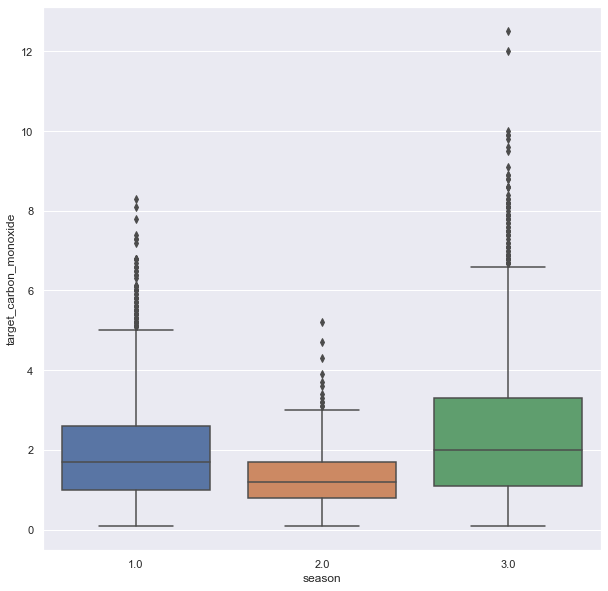

In [84]:
sns.boxplot(x='season', y='target_carbon_monoxide', data=data)
sns.set(rc={'figure.figsize':(10, 10)})

<AxesSubplot:xlabel='season', ylabel='target_benzene'>

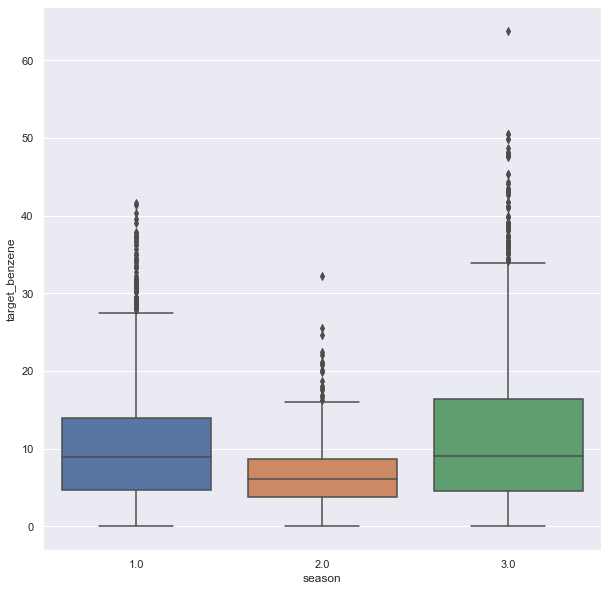

In [85]:
sns.boxplot(x='season', y='target_benzene', data=data)

<AxesSubplot:xlabel='season', ylabel='target_nitrogen_oxides'>

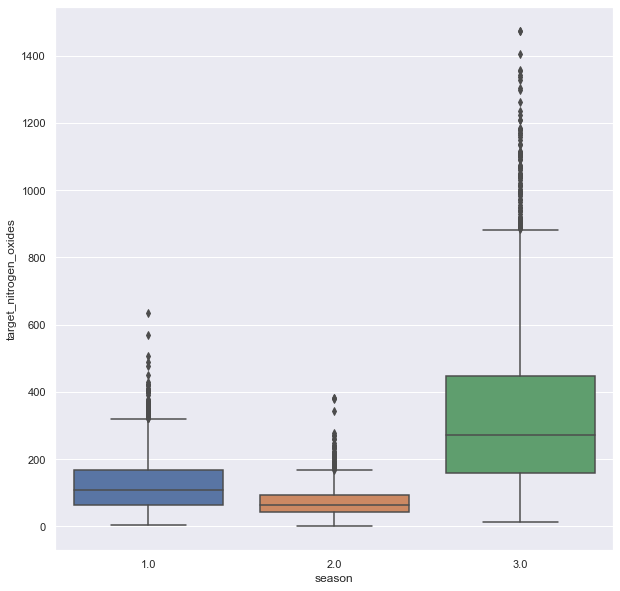

In [86]:
sns.boxplot(x='season', y='target_nitrogen_oxides', data=data)

Для третьего таргета распределение на третьем сезоне значительно меняется